In [1]:
import copy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**MetaData**

**Data Dictionary:**

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes:**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Code**

In [2]:
training_data = pd.read_csv('titanic_train.csv')

In [3]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
pclass_dummies = pd.get_dummies(training_data['Pclass'], prefix='Pclass')
training_data.drop('Pclass', axis=1, inplace=True)
training_data = pd.concat([training_data, pclass_dummies], axis=1)

In [6]:
training_data

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,True,False
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,False,True
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True,False,False


In [7]:
print(training_data.isnull().sum())


PassengerId      0
Survived         0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64


In [8]:
training_data['Embarked'] = training_data['Embarked'].fillna(training_data['Embarked'].mode()[0])

<Axes: xlabel='Age', ylabel='Count'>

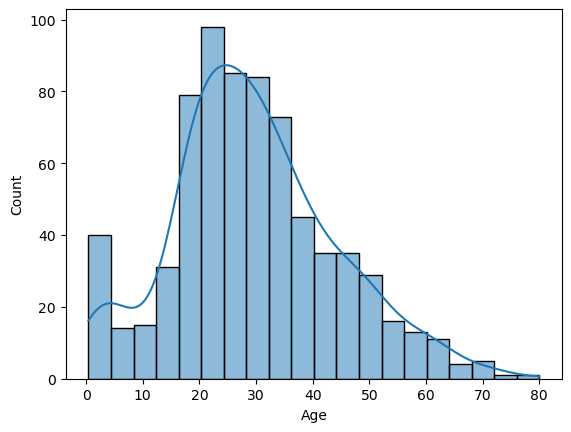

In [9]:
sns.histplot(training_data['Age'],kde=True)

In [10]:
training_data['Age'] = training_data['Age'].fillna(training_data['Age'].median())

In [11]:
# Create Deck from Cabin first letter, mark missing as 'U'
training_data['Deck'] = training_data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')

# Drop the original Cabin column
training_data = training_data.drop(columns=['Cabin'])


In [12]:
training_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
gender_dummies = pd.get_dummies(training_data['Sex'],prefix='Gender')
training_data.drop("Sex",axis=1,inplace=True)
training_data = pd.concat([training_data,gender_dummies],axis=1)

In [14]:
Embarked_dummies = pd.get_dummies(training_data['Embarked'],prefix='Embarked')
training_data.drop("Embarked",axis=1,inplace=True)
training_data = pd.concat([training_data,Embarked_dummies],axis=1)

In [15]:
Deck_dummies = pd.get_dummies(training_data['Deck'],prefix='Deck')
training_data.drop("Deck",axis=1,inplace=True)
training_data = pd.concat([training_data,Deck_dummies],axis=1)

In [16]:
training_data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,...,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,False,...,True,False,False,False,False,False,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,...,False,False,False,True,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,...,True,False,False,False,False,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,...,True,False,False,True,False,False,False,False,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,...,True,False,False,False,False,False,False,False,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,...,True,False,True,False,False,False,False,False,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,...,True,False,False,False,False,False,False,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,...,False,False,False,True,False,False,False,False,False,False


In [17]:
for x in training_data.columns:
    print(x)


PassengerId
Survived
Name
Age
SibSp
Parch
Ticket
Fare
Pclass_1
Pclass_2
Pclass_3
Gender_female
Gender_male
Embarked_C
Embarked_Q
Embarked_S
Deck_A
Deck_B
Deck_C
Deck_D
Deck_E
Deck_F
Deck_G
Deck_T
Deck_U


In [18]:
X_train = training_data[['Age','SibSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Gender_female','Gender_male',
                         'Embarked_C','Embarked_Q','Embarked_S','Deck_A','Deck_B','Deck_C',
                         'Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Deck_U']].to_numpy()

In [19]:
y_train = training_data['Survived'].to_numpy()

In [20]:
print(X_train)
print('\n\n')
print(y_train)

[[22.0 1 0 ... False False True]
 [38.0 1 0 ... False False False]
 [26.0 0 0 ... False False True]
 ...
 [28.0 1 2 ... False False True]
 [26.0 0 0 ... False False False]
 [32.0 0 0 ... False False True]]



[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 

In [21]:
X_org = copy.deepcopy(X_train)
y_org = copy.deepcopy(y_train)

In [22]:
def z_score_normalize(X):
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X-mu)/sigma
    return X_norm

In [23]:
X_train = z_score_normalize(X_train)

In [24]:
X_train

array([[1.3115076981111875, -0.15077194724215512, -0.22040431130660001,
        ..., -0.22040431130660001, -0.22040431130660001,
        -0.15077194724215512],
       [2.425625523142306, -0.15077194724215512, -0.22040431130660001,
        ..., -0.22040431130660001, -0.22040431130660001,
        -0.22040431130660001],
       [1.590037154368967, -0.22040431130660001, -0.22040431130660001,
        ..., -0.22040431130660001, -0.22040431130660001,
        -0.15077194724215512],
       ...,
       [1.729301882497857, -0.15077194724215512, -0.08113958317771022,
        ..., -0.22040431130660001, -0.22040431130660001,
        -0.15077194724215512],
       [1.590037154368967, -0.22040431130660001, -0.22040431130660001,
        ..., -0.22040431130660001, -0.22040431130660001,
        -0.22040431130660001],
       [2.0078313387556364, -0.22040431130660001, -0.22040431130660001,
        ..., -0.22040431130660001, -0.22040431130660001,
        -0.15077194724215512]], dtype=object)

In [25]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)

Shape of X_train:  (891, 21)
Shape of y_train:  (891,)


In [26]:
#We will be using Regularization here, since there are many parameters

In [27]:
import numpy as np

In [28]:
def sigmoid(z_tmp):
    g_z = 1/(1+np.exp(-z_tmp))
    return g_z

In [29]:
z = 0
print(sigmoid(z))

0.5


In [30]:
import numpy as np
print(np.exp(-1.0))
print(np.exp(np.array([1.0, 2.0])))

0.36787944117144233
[2.71828183 7.3890561 ]


In [31]:
print(np)

<module 'numpy' from 'D:\\AI_ML_DS\\Lib\\site-packages\\numpy\\__init__.py'>


In [32]:
def compute_cost(X,y,w,b,lambda_):
    m,n= X.shape
    cost = 0.
    reg_cost= 0.
    for i in range(m):
        z = X[i]@w +b
        f = sigmoid(z)
        cost+= (-y[i]*np.log(f)) - ((1-y[i])*np.log(1-f))
    cost/=m
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost = reg_cost*(lambda_/(2*m))
    return cost+reg_cost

In [33]:
# def compute_gradient(X, y, w, b, lambda_):
#     m, n = X.shape
#     z = X @ w + b
#     err = sigmoid(z) - y
#     dj_db = np.sum(err) / m
#     dj_dw = (X.T @ err) / m + (lambda_ * w) / m
#     return dj_dw, dj_db

In [34]:
def compute_gradient(X,y,w,b,lambda_):
    m,n= X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        z= X[i]@w+b
        err = sigmoid(z) -y[i]
        dj_db+=err
        for j in range(n):
            dj_dw_j = err*X[i,j]
            dj_dw[j]+=dj_dw_j
    dj_dw/=m
    dj_db/=m
    for j in range(n):
        dj_dw[j]+= (lambda_/m)*w[j]
    return dj_dw,dj_db

In [35]:
def gradient_descent(X,y,w_in,b_in,alpha,num_iters,lambda_=1):
    w=copy.deepcopy(w_in)
    b=b_in
    J_hist= []
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(X,y,w,b,lambda_)
        w = w-alpha*(dj_dw)
        b=b-alpha*dj_db
        cost = compute_cost(X,y,w,b,lambda_)
        J_hist.append(cost)
        if i%math.ceil(num_iters/10)==0:
            print(f"iteraton: {i}, w: {w}, b: {b}, cost: {J_hist[-1]}")
    return w,b,J_hist

In [36]:
import numpy as np
print("np is:", np)
print("type(np):", type(np))
print("np.exp is:", getattr(np, "exp", "NO exp ATTRIBUTE"))

np is: <module 'numpy' from 'D:\\AI_ML_DS\\Lib\\site-packages\\numpy\\__init__.py'>
type(np): <class 'module'>
np.exp is: <ufunc 'exp'>


In [37]:
m,n = X_train.shape
w_i = np.zeros(n)
b_i = 0
alpha = 0.67
num_iters = 10000
lambda_= 0.099
w_final,b_final,hist = gradient_descent(X_train,y_train,w_i,b_i,alpha,num_iters,lambda_)
print("\nFinal values:\n")
print(f"final w: {w_final}, final b: {b_final}, cost: {hist[-1]}")

iteraton: 0, w: [-0.16113119  0.01343606  0.01657772  0.13257075  0.0186198   0.01689188
  0.01053002  0.02113313  0.00775488  0.01762494  0.01670862  0.01170814
  0.01712751  0.01775584  0.01744167  0.01759876  0.01757258  0.01723223
  0.01715369  0.01712751  0.00995405], b: -0.07782828282828283, cost: 0.6389226992032198
iteraton: 1000, w: [-0.29284199 -1.89168556 -0.02471991  0.19062032  1.06539515  1.03396362
 -1.95564451  4.28278988 -4.19261903  0.70103982  0.2599955  -0.81732105
  0.12080742  0.35421035  0.04040216  0.51127517  0.55602754  0.19708754
  0.06687436  0.03669424 -1.41840402], b: -0.2623536394841178, cost: 0.5470904674492361
iteraton: 2000, w: [-0.32119505 -2.69128259 -0.08027931  0.16166785  1.80894627  1.66805258
 -3.37179818  7.14083761 -7.0748314   1.10400446  0.38120845 -1.38001224
  0.16681216  0.54759684 -0.00925807  0.8451999   0.94583072  0.29393783
  0.04834079  0.00735026 -2.50544299], b: -0.21293248773303156, cost: 0.513737319244146
iteraton: 3000, w: [-0.3

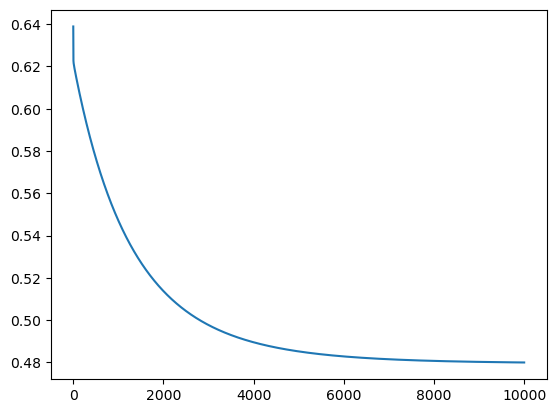

In [39]:
plt.plot(hist)

In [142]:
def predict(X,w,b):
    pred = np.zeros(m)
    for i in range(m):
        z = X[i]@w+b
        f = sigmoid(z)
        if f>=0.375: pred[i]=1
    return pred

In [143]:
y_pred = predict(X_train,w_final,b_final)
y_pred[:10]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

In [144]:
# Accuracy:
print("The accuracy is:",np.mean(y_pred==y_train)*100)

The accuracy is: 79.12457912457911


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       549
           1       0.71      0.77      0.74       342

    accuracy                           0.79       891
   macro avg       0.78      0.79      0.78       891
weighted avg       0.80      0.79      0.79       891



In [146]:
# Percentage of 1s
percent_ones = np.sum(y_train == 1) / m * 100

# Percentage of 0s
percent_zeros = np.sum(y_train == 0) / m * 100

print("percentage of ones in the org dataset: ",percent_ones)
print("percentage of zeros in the org dataset: ",percent_zeros)

percentage of ones in the org dataset:  38.38383838383838
percentage of zeros in the org dataset:  61.61616161616161


In [147]:
# Percentage of 1s
percent_ones = np.sum(y_pred == 1) / m * 100

# Percentage of 0s
percent_zeros = np.sum(y_pred == 0) / m * 100

print("percentage of ones in the pred dataset: ",percent_ones)
print("percentage of zeros in the pred dataset: ",percent_zeros)

percentage of ones in the pred dataset:  41.52637485970819
percentage of zeros in the pred dataset:  58.47362514029181
